# Unit 5 - Financial Planning

In [43]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [44]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [45]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [46]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [47]:
# Fetch current BTC price
btc_url = btc_url + "?format=json"
response_data = requests.get(btc_url).json()
my_btc_value = response_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_url = eth_url + "?format=json"
response_data = requests.get(eth_url).json()
my_eth_value = response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
eth_value = my_eth * my_eth_value
btc_value = my_btc * my_btc_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $44496.00
The current value of your 5.3 ETH is $14155.08


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [56]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [59]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [78]:
# Format current date as ISO format
start = pd.Timestamp("2016-02-02", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-02-02", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio_year = api.get_barset(
    tickers,
    timeframe,
    start = start,
    
    limit = 1000
).df

# Display sample data
df_portfolio_year.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2018-02-14 00:00:00-05:00  106.57  106.6600  106.4039  106.46  3695997   
2018-02-15 00:00:00-05:00  106.55  106.7272  106.5300  106.59  2398428   
2018-02-16 00:00:00-05:00  106.85  106.8750  106.7100  106.81  3391074   
2018-02-20 00:00:00-05:00  106.69  106.7099  106.5501  106.68  2372055   
2018-02-21 00:00:00-05:00  106.77  106.8000  106.2601  106.30  3017853   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2018-02-14 00:00:00-05:00  264.47  270.00  263.97  269.71  86705860  
2018-02-15 00:00:00-05:00  271.59  273.01  268.77  273.00  72021939  
2018-02-16 00:00:00-05:00  272.31  275.32  272.27  273.09  76314679  
2018-02-20 00:00:00-05:00  272.03  273.67  264.84  271.43  54829423  
2018-02-21 00:00:00-05:00  271.90  274.72  269.98  270.00  67813909

In [79]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio_year["AGG"]["close"][0]) 
spy_close_price = float(df_portfolio_year["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.46
Current SPY closing price: $269.71


In [80]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $13485.50
The current value of your 200 AGG shares is $21292.00


### Savings Health Analysis

In [81]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data

crypto = eth_value + btc_value
shares = my_agg_value + my_spy_value

amount_data = {
    "amount":[crypto,shares]
}

index_data = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=index_data)


# Display savings DataFrame
display(df_savings)

,amount
crypto,58651.081
shares,34777.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

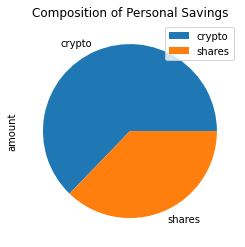

In [82]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [83]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health

goal_value = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")

else:
    print(f"You are {goal_value} dollars away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [86]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp("2016-02-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-02-02", tz="America/New_York").isoformat()

In [87]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2017-02-10 00:00:00-05:00  108.26  108.47  108.26  108.45  2221943.0     NaN   
2017-02-13 00:00:00-05:00  108.34  108.35  108.23  108.32  2032088.0  232.08   
2017-02-14 00:00:00-05:00  108.30  108.30  107.91  108.06  2419303.0  232.56   
2017-02-15 00:00:00-05:00  107.92  108.00  107.86  107.92  1679278.0  233.45   
2017-02-16 00:00:00-05:00  108.01  108.28  108.01  108.13  5104745.0  234.96   

                                                                
                              high     low   close      volume  
time                                                            
2017-02-10 00:00:00-05:00      NaN     NaN     NaN         NaN  
2017-02-13 00:00:00-05:00  233.070  232.05  232.73  42341887.0  
2017-02-14 00:00:00-05:00  233.710  232.16  233.71  50850084.0  
2017-02-15 00:00:00-05:00  235.140  233.39  234.87  61469145.0  
2017-02-16 00:00:00-05:00  235.155  233.85  234.73  66786200.0

In [90]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 1000,
    num_trading_days = 252*30
)

In [91]:
# Printing the simulation input data
MC_Daily.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2017-02-10 00:00:00-05:00  108.26  108.47  108.26  108.45  2221943.0   
2017-02-13 00:00:00-05:00  108.34  108.35  108.23  108.32  2032088.0   
2017-02-14 00:00:00-05:00  108.30  108.30  107.91  108.06  2419303.0   
2017-02-15 00:00:00-05:00  107.92  108.00  107.86  107.92  1679278.0   
2017-02-16 00:00:00-05:00  108.01  108.28  108.01  108.13  5104745.0   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2017-02-10 00:00:00-05:00          NaN     NaN      NaN     NaN     NaN   
2017-02-13 00:00:00-05:00    -0.001199  232.08  233.070  232.05  232.73   
2017-02-14 00:00:00-05:00    -0.002400  232.56  233.710  232.16  233.71   
2017-02-15 00:00:00-05:00    -0.001296  233.45  235.140  233.39  234.87   
2017-02-16 00:00:00-05:00     0.001946  234.96  235.155  233.85  234.73   

                                                    
                               volume daily_return  
time                                                
2017-02-10 00:00:00-05:00         NaN          NaN  
2017-02-13 00:00:00-05:00  42341887.0          NaN  
2017-02-14 00:00:00-05:00  50850084.0     0.004211  
2017-02-15 00:00:00-05:00  61469145.0     0.004963  
2017-02-16 00:00:00-05:00  66786200.0    -0.000596

In [92]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/shavanpatel/Desktop/usyd-syd-fin-pt-12-2021-u-c-master/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007082,0.983844,1.013829,0.988992,0.998131,0.995827,1.000571,1.000034,0.996180,0.998753,...,0.996849,1.009833,0.994528,0.991864,1.008342,1.014098,0.987272,1.009202,0.998749,1.008531
2,1.004632,0.974800,1.014075,0.982705,1.000416,0.998361,0.984789,1.009575,1.002440,0.996568,...,1.001577,1.024523,1.008131,0.988720,1.020638,1.013429,0.991009,1.003015,0.990352,1.012930
3,0.995438,0.972073,1.026676,0.980630,0.991480,1.004264,0.995175,1.004827,1.011112,0.990570,...,1.009857,1.023448,0.997989,1.000813,1.014623,1.017871,0.999666,0.992394,0.988308,1.015418
4,0.995673,0.962786,1.030025,0.980125,1.000752,0.998241,0.999578,1.007029,1.020202,0.993539,...,0.999124,1.032868,1.002230,1.015325,1.024314,1.030275,0.989484,0.989882,0.999683,1.003581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.063875,9.595063,18.832826,11.497997,16.774785,4.609472,33.347513,5.685278,21.604969,18.897736,...,6.864385,35.726544,15.999480,12.022422,12.495060,9.807257,22.327926,12.958127,20.893520,28.672339
7557,13.098296,9.815449,18.779368,11.642731,16.837931,4.621278,33.230524,5.739466,21.388828,18.753147,...,6.853558,36.084380,15.955612,11.918238,12.779304,9.856710,22.197573,13.074918,20.908389,28.397691
7558,13.081843,9.914366,18.517542,11.635214,16.753111,4.589763,33.229375,5.744267,21.498940,18.779451,...,6.911732,35.809618,15.863655,11.915235,12.722017,9.781777,22.246896,13.047645,20.812405,28.480459
7559,13.194040,9.975050,18.824252,11.645684,17.172135,4.611038,33.502259,5.645485,21.361294,18.630265,...,6.967764,35.795579,15.870740,11.843512,12.762708,9.820720,22.072591,12.899160,20.973039,28.630865


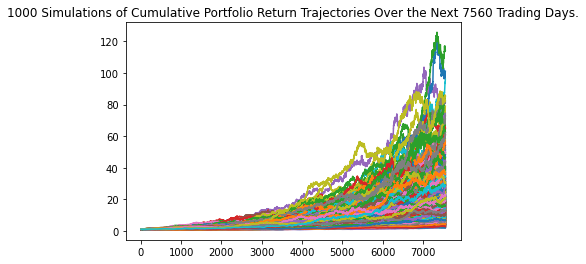

In [93]:
# Plot simulation outcomes
line_plot = MC_Daily.plot_simulation()

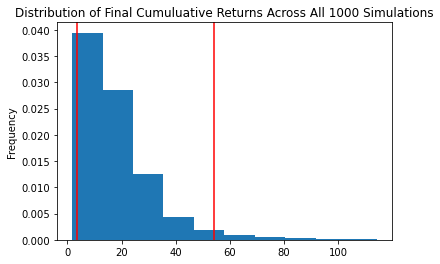

In [94]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Daily.plot_distribution()

### Retirement Analysis

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl = MC_Daily.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl)

count           1000.000000
mean              18.108181
std               13.819342
min                1.732979
25%                8.899774
50%               14.348467
75%               23.190541
max              114.221536
95% CI Lower       3.434599
95% CI Upper      54.182400
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [96]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_tbl[8]*initial_investment,2)
ci_upper = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $68691.98 and $1083648.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [97]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_tbl[8]*initial_investment,2)
ci_upper = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $103037.97 and $1625472.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")